## Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from textblob import TextBlob
from wordcloud import WordCloud

## Generate The String with Random 

In [4]:
subjek = [
    'Saya', 'Dia', 'Mereka', 'Kami', 'Kamu', 'Budi', 'Rina', 'Pak Andi', 'Ibu Siti', 'Anak-anak', 
    "Pacarku", "Doiku", 'Mantan pacarku', 'Teman-temanku', 'Keluargaku', 'Teman sekelas', 'Guru kami', 'Rekan kerja', 'Tetangga'
]

# Predikat untuk kalimat positif, negatif, dan netral
predikat_positif = [
    'mencintai', 'menyukai', 'menghargai', 'memahami', 'memuja', 'menyayangi', 'membantu', 'mengidolakan', 
    'merayakan', 'mendukung', 'membanggakan', 'menghormati'
]

predikat_negatif = [
    'membenci', 'mengabaikan', 'meninggalkan', 'merindukan', 'menghindari', 'menolak', 'mengabaikan', 'memarahi', 
    'mempersalahkan'
]

predikat_netral = [
    'berbicara tentang', 'membicarakan', 'memikirkan', 'menanyakan', 'menyelesaikan', 'menceritakan', 'menyebutkan'
]

# Objek untuk kalimat positif, negatif, dan netral
objek_positif = [
    'keindahan', 'seni', 'kebudayaan', 'kemajuan', 'pertemuan', 'kenangan', 'makanan', 'film'
]

objek_negatif = [
    'politik', 'konflik', 'kekecewaan', 'kerugian', 'kesulitan', 'masalah', 'ketegangan', 'kebencian'
]

objek_netral = [
    'musik', 'film', 'buku', 'teknologi', 'alam', 'perjalanan', 'sepak bola', 'ilmuwan'
]

# Fungsi untuk menghasilkan kalimat acak dengan emosi
def generate_sentence():
    # Pilih kategori emosi secara acak
    emosi = random.choice(['positif', 'negatif', 'netral'])
    
    if emosi == 'positif':
        predikat = random.choice(predikat_positif)
        objek = random.choice(objek_positif)
    elif emosi == 'negatif':
        predikat = random.choice(predikat_negatif)
        objek = random.choice(objek_negatif)
    else:
        predikat = random.choice(predikat_netral)
        objek = random.choice(objek_netral)
    
    return f"{random.choice(subjek)} {predikat} {objek}."

kalimat_list = [generate_sentence() for _ in range(10**3)]

df_kalimat = pd.DataFrame(kalimat_list, columns=["Kalimat"])

# Menyimpan ke file Excel
# df_kalimat.to_excel('kalimat_bervariasi_emosi_juta.xlsx', index=False)

print("File kalimat_bervariasi_emosi_juta.xlsx telah dibuat!")

File kalimat_bervariasi_emosi_juta.xlsx telah dibuat!


In [5]:
df_kalimat.head()

,Kalimat
0,Kamu meninggalkan ketegangan.
1,Mantan pacarku menyelesaikan film.
2,Budi memikirkan sepak bola.
3,Saya menceritakan musik.
4,Pak Andi membicarakan ilmuwan.


## Count vowels and consonants in this string

In [6]:
if 'Kalimat' in df_kalimat.columns:
    def hitung_vokal_konsonan(kalimat):
        vokal = 'aeiouAEIOU'
        jumlah_vokal = sum(1 for char in str(kalimat) if char in vokal)
        jumlah_konsonan = sum(1 for char in str(kalimat) if char.isalpha() and char not in vokal)
        return pd.Series([jumlah_vokal, jumlah_konsonan])

    df_kalimat[['jumlah_vokal', 'jumlah_konsonan']] = df_kalimat['Kalimat'].apply(hitung_vokal_konsonan)

    print(df_kalimat[['Kalimat', 'jumlah_vokal', 'jumlah_konsonan']].head())
else:
    print("Kolom 'Kalimat' tidak ditemukan di dalam DataFrame.")


                              Kalimat  jumlah_vokal  jumlah_konsonan
0       Kamu meninggalkan ketegangan.            10               16
1  Mantan pacarku menyelesaikan film.            12               18
2         Budi memikirkan sepak bola.            10               13
3            Saya menceritakan musik.             9               12
4      Pak Andi membicarakan ilmuwan.            11               15


In [7]:
df_kalimat

,Kalimat,jumlah_vokal,jumlah_konsonan
0,Kamu meninggalkan ketegangan.,10,16
1,Mantan pacarku menyelesaikan film.,12,18
2,Budi memikirkan sepak bola.,10,13
3,Saya menceritakan musik.,9,12
4,Pak Andi membicarakan ilmuwan.,11,15
...,...,...,...
995,Pak Andi mengabaikan kesulitan.,12,15
996,Rekan kerja mempersalahkan politik.,12,19
997,Tetangga mempersalahkan kebencian.,12,19
998,Rina membanggakan keindahan.,10,15


## Add the len of letters

In [8]:
df_kalimat['Panjang Kalimat'] = df_kalimat['Kalimat'].apply(len)

## Check the sentence for a specific subject

In [9]:
subjek_spesifik = ['Budi', 'Rina', 'Pak Andi', 'Ibu Siti']

df_kalimat['Subjek Spesifik'] = df_kalimat['Kalimat'].apply(lambda x: any(subjek in x for subjek in subjek_spesifik))

In [10]:
df_kalimat

,Kalimat,jumlah_vokal,jumlah_konsonan,Panjang Kalimat,Subjek Spesifik
0,Kamu meninggalkan ketegangan.,10,16,29,False
1,Mantan pacarku menyelesaikan film.,12,18,34,False
2,Budi memikirkan sepak bola.,10,13,27,True
3,Saya menceritakan musik.,9,12,24,False
4,Pak Andi membicarakan ilmuwan.,11,15,30,True
...,...,...,...,...,...
995,Pak Andi mengabaikan kesulitan.,12,15,31,True
996,Rekan kerja mempersalahkan politik.,12,19,35,False
997,Tetangga mempersalahkan kebencian.,12,19,34,False
998,Rina membanggakan keindahan.,10,15,28,True


## Analysis the Sentiment of Sentence

In [11]:
from textblob import TextBlob

# Misalnya, data yang sebelumnya sudah ada di DataFrame df_kalimat
# Tambahkan kolom baru untuk analisis sentimen
def analisis_sentimen(kalimat):
    blob = TextBlob(kalimat)
    sentiment_polarity = blob.sentiment.polarity  # Nilai antara -1 (negatif) dan 1 (positif)
    sentiment_subjectivity = blob.sentiment.subjectivity  # Nilai antara 0 (objektif) dan 1 (subjektif)
    return pd.Series([sentiment_polarity, sentiment_subjectivity])

# Terapkan fungsi analisis sentimen ke kolom 'Kalimat' dan tambahkan hasilnya sebagai kolom baru
df_kalimat[['sentiment_polarity', 'sentiment_subjectivity']] = df_kalimat['Kalimat'].apply(analisis_sentimen)

# Tampilkan DataFrame dengan kolom baru untuk analisis sentimen
print(df_kalimat[['Kalimat', 'sentiment_polarity', 'sentiment_subjectivity']].head())

                              Kalimat  sentiment_polarity  \
0       Kamu meninggalkan ketegangan.                 0.0   
1  Mantan pacarku menyelesaikan film.                 0.0   
2         Budi memikirkan sepak bola.                 0.0   
3            Saya menceritakan musik.                 0.0   
4      Pak Andi membicarakan ilmuwan.                 0.0   

   sentiment_subjectivity  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  


In [12]:
def klasifikasi_sentimen(polarity):
    if polarity > 0.1:
        return "positif"
    elif polarity < -0.1:
        return "negatif"
    else:
        return "netral"

df_kalimat['sentimen_kategori'] = df_kalimat['sentiment_polarity'].apply(klasifikasi_sentimen)
print(df_kalimat[['Kalimat', 'sentiment_polarity', 'sentimen_kategori']].head())

                              Kalimat  sentiment_polarity sentimen_kategori
0       Kamu meninggalkan ketegangan.                 0.0            netral
1  Mantan pacarku menyelesaikan film.                 0.0            netral
2         Budi memikirkan sepak bola.                 0.0            netral
3            Saya menceritakan musik.                 0.0            netral
4      Pak Andi membicarakan ilmuwan.                 0.0            netral


### Visualization the result

C:\Users\windows\AppData\Local\Temp\ipykernel_75556\3743118180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_kalimat, x='sentimen_kategori', palette='viridis')


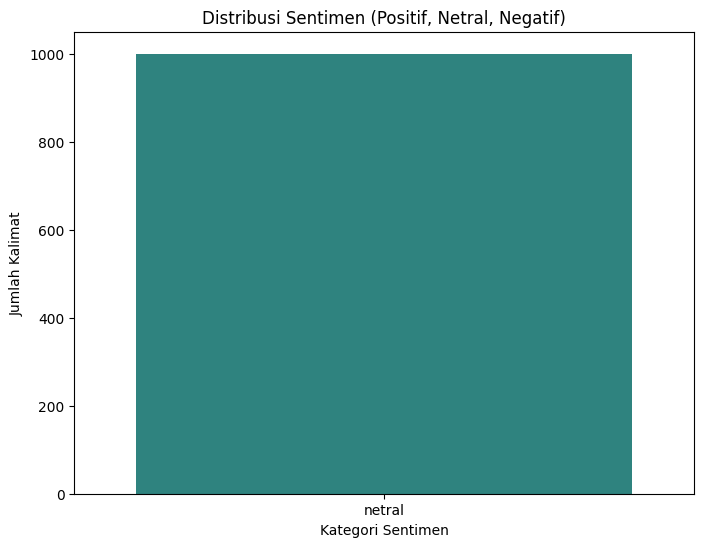

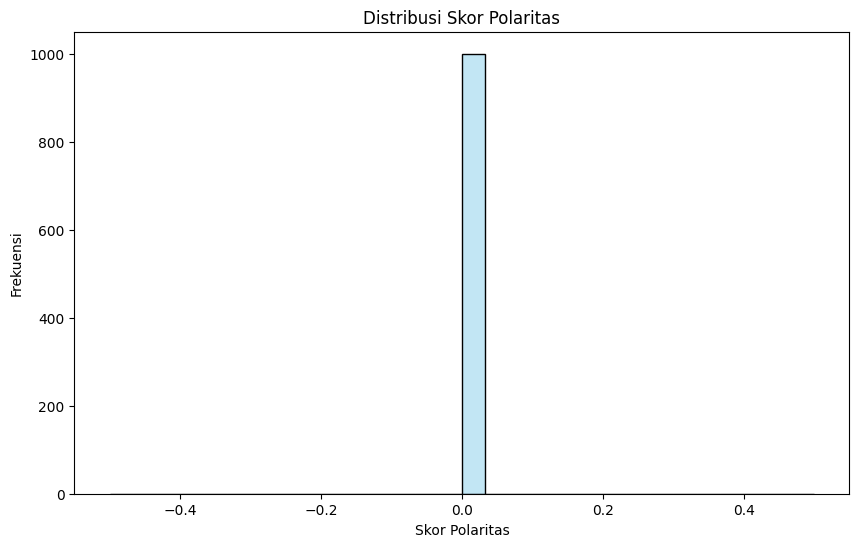

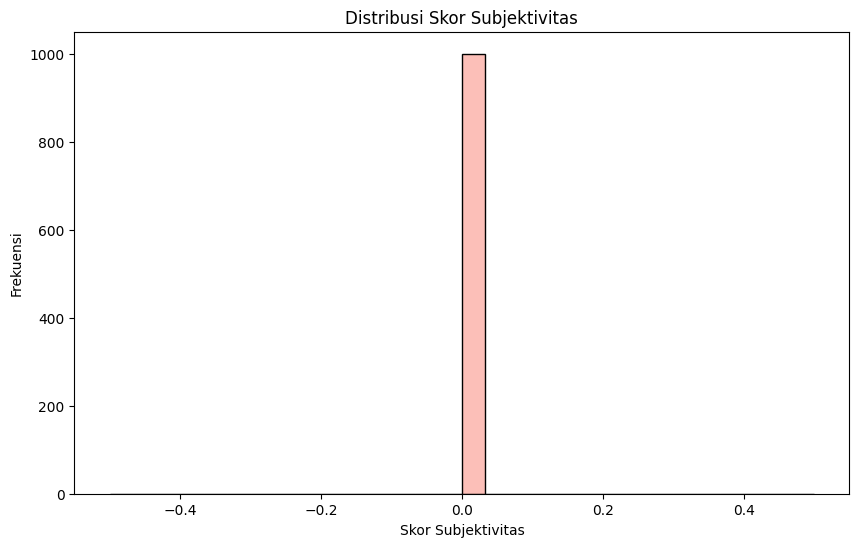

In [13]:
# 1. Visualisasi Jumlah Kalimat Berdasarkan Kategori Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=df_kalimat, x='sentimen_kategori', palette='viridis')
plt.title("Distribusi Sentimen (Positif, Netral, Negatif)")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Kalimat")
plt.show()

# 2. Visualisasi Distribusi Skor Polaritas
plt.figure(figsize=(10, 6))
sns.histplot(df_kalimat['sentiment_polarity'], kde=True, color='skyblue', bins=30)
plt.title("Distribusi Skor Polaritas")
plt.xlabel("Skor Polaritas")
plt.ylabel("Frekuensi")
plt.show()

# 3. Visualisasi Distribusi Skor Subjektivitas
plt.figure(figsize=(10, 6))
sns.histplot(df_kalimat['sentiment_subjectivity'], kde=True, color='salmon', bins=30)
plt.title("Distribusi Skor Subjektivitas")
plt.xlabel("Skor Subjektivitas")
plt.ylabel("Frekuensi")
plt.show()


## Visualization the most frequenct of sentence

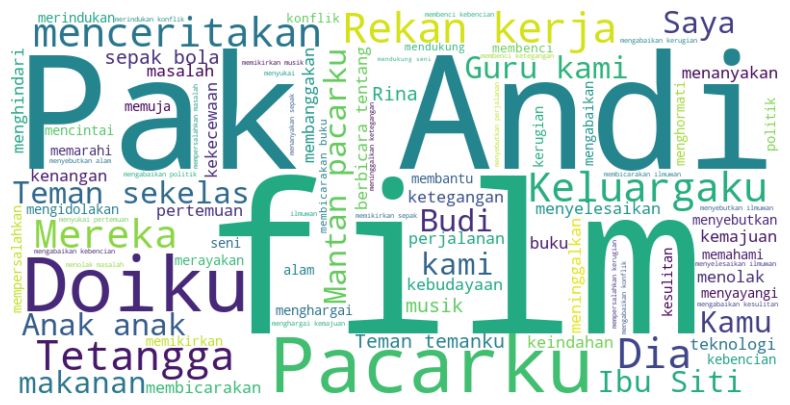

In [14]:
# Gabungkan semua teks dalam kolom 'Kalimat'
text = " ".join(df_kalimat['Kalimat'].astype(str))

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Save model to excel 

In [15]:
# Menyimpan ke file Excel
with pd.ExcelWriter('kalimatStr.xlsx', engine='openpyxl') as writer:
    df_kalimat.to_excel(writer, index=True, sheet_name='Sheet1')
    
    # Mengakses sheet yang telah dibuat
    workbook = writer.book
    sheet = workbook['Sheet1']
    
    # Menyesuaikan lebar kolom otomatis berdasarkan isi data
    for col in sheet.columns:
        max_length = 0
        column = col[0].column_letter  # Mendapatkan nama kolom, misalnya 'A'
        for cell in col:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(cell.value)
            except:
                pass
        adjusted_width = (max_length + 2)  # Menambahkan sedikit ruang ekstra
        sheet.column_dimensions[column].width = adjusted_width
    
    # Menambahkan border ke setiap sel di sheet
    from openpyxl.styles import Border, Side
    thin_border = Border(left=Side(style='thin'), right=Side(style='thin'),
                         top=Side(style='thin'), bottom=Side(style='thin'))
    
    for row in sheet.iter_rows():
        for cell in row:
            cell.border = thin_border